In [1]:
import pandas as pd


In [2]:
# Importamos las librerias necesarias
df=pd.read_csv('./diabetes.csv') #Cargamos el dataset

In [3]:
df.info() #Informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head() #Primeras 5 filas del dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


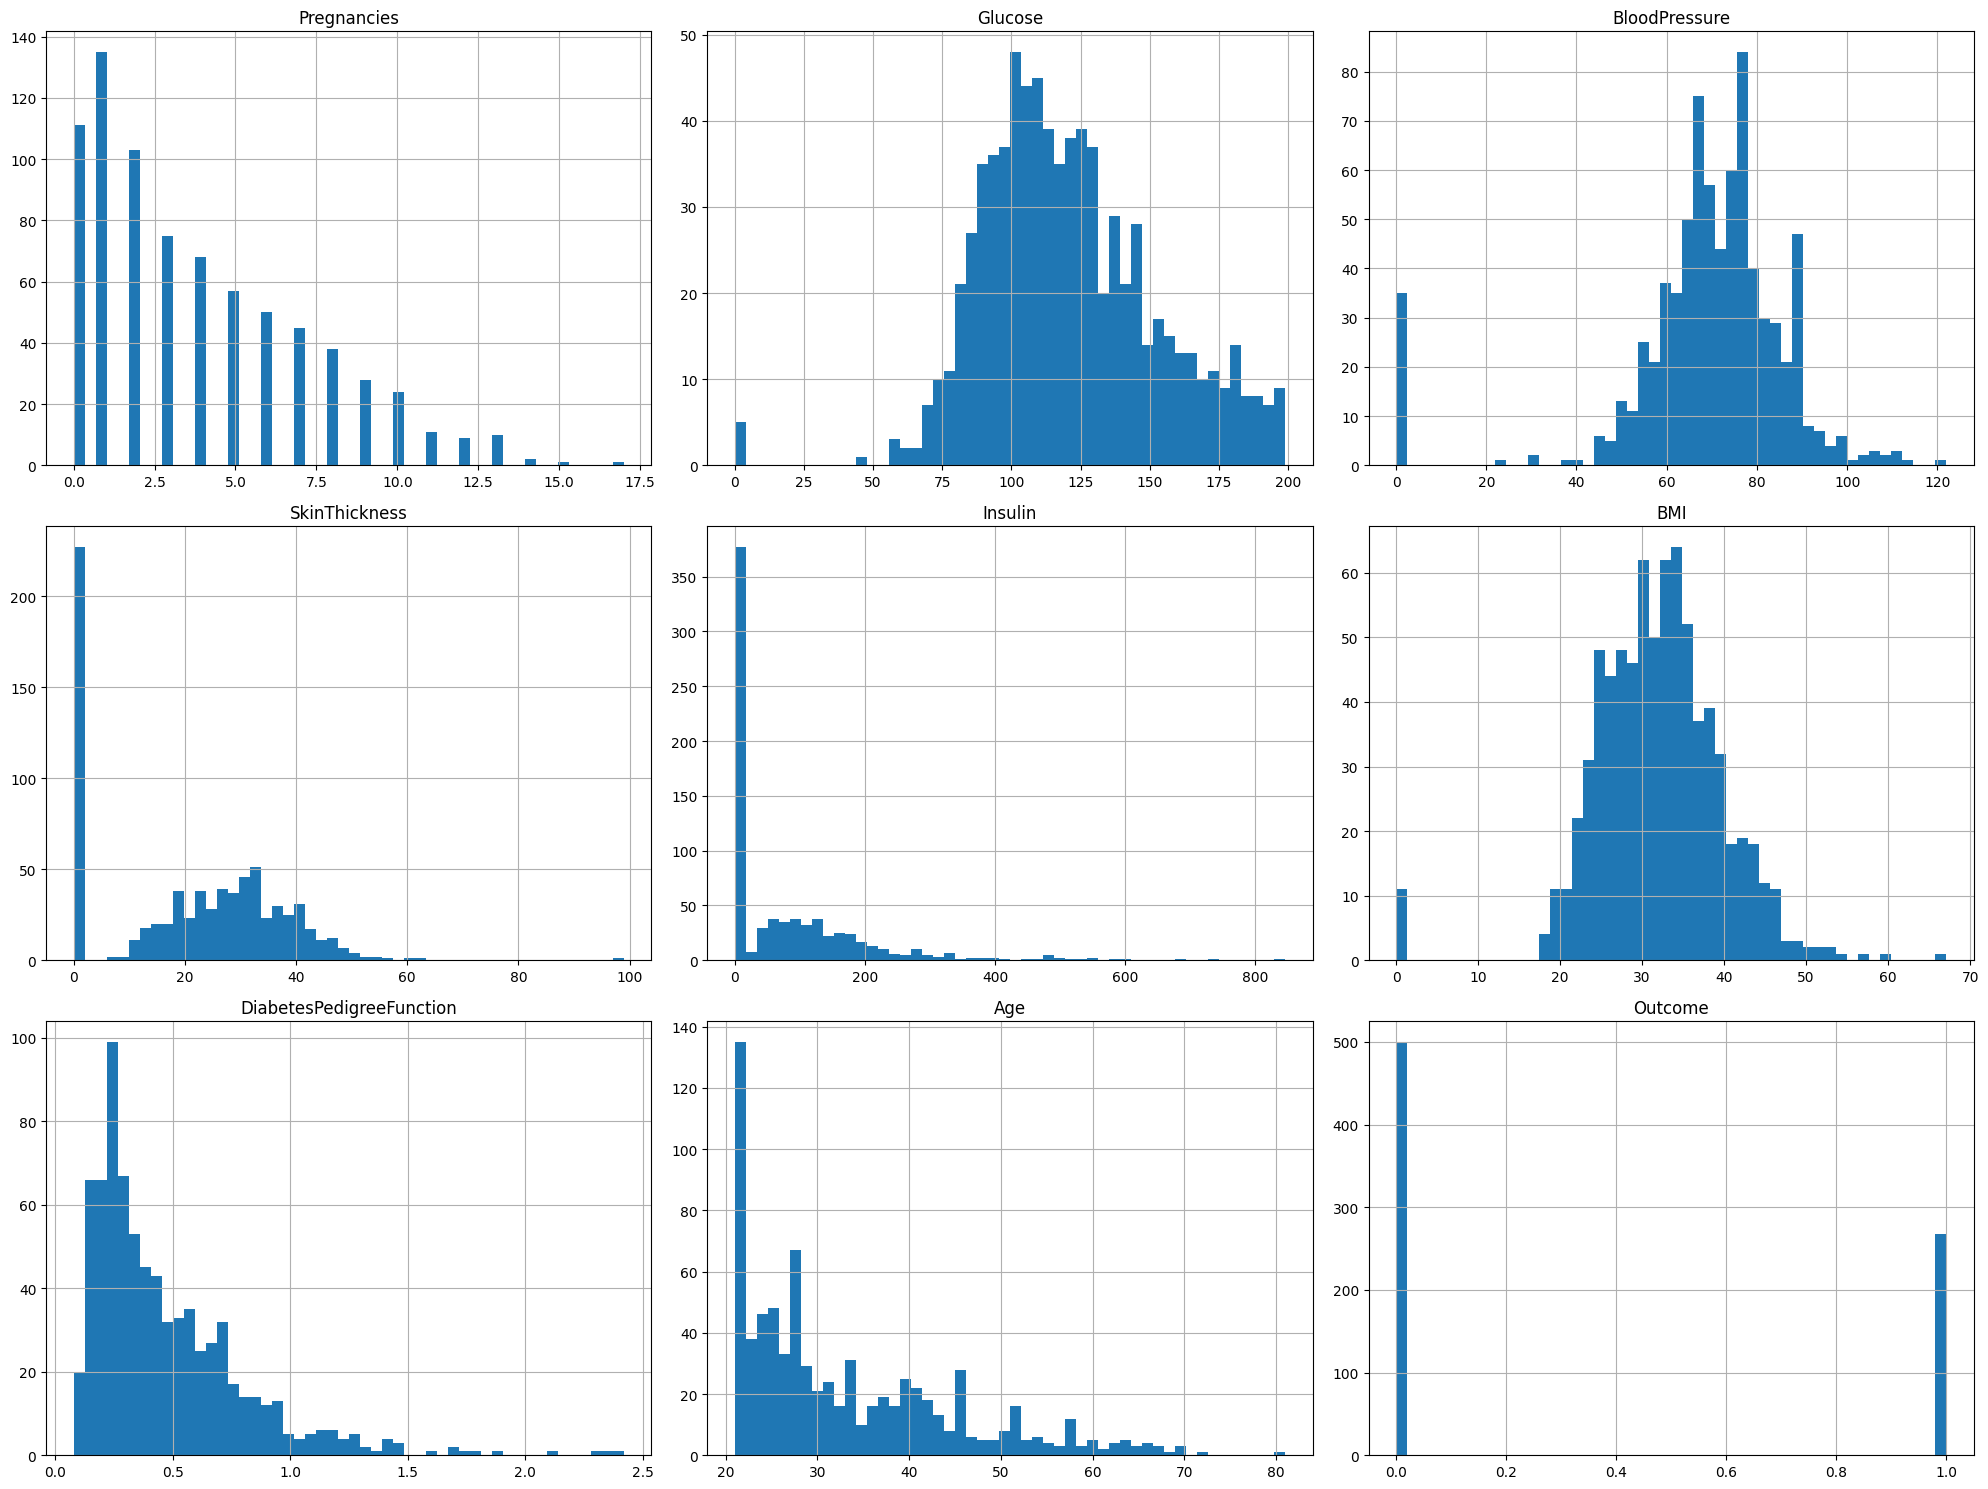

In [5]:
from utils.visualize import hist

hist(df)

Al parecer hay datos en 0 y ni puede haber personas con esa cantidad

In [6]:
# df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
# df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
# df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
# df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


Muestreo aleatorio simple

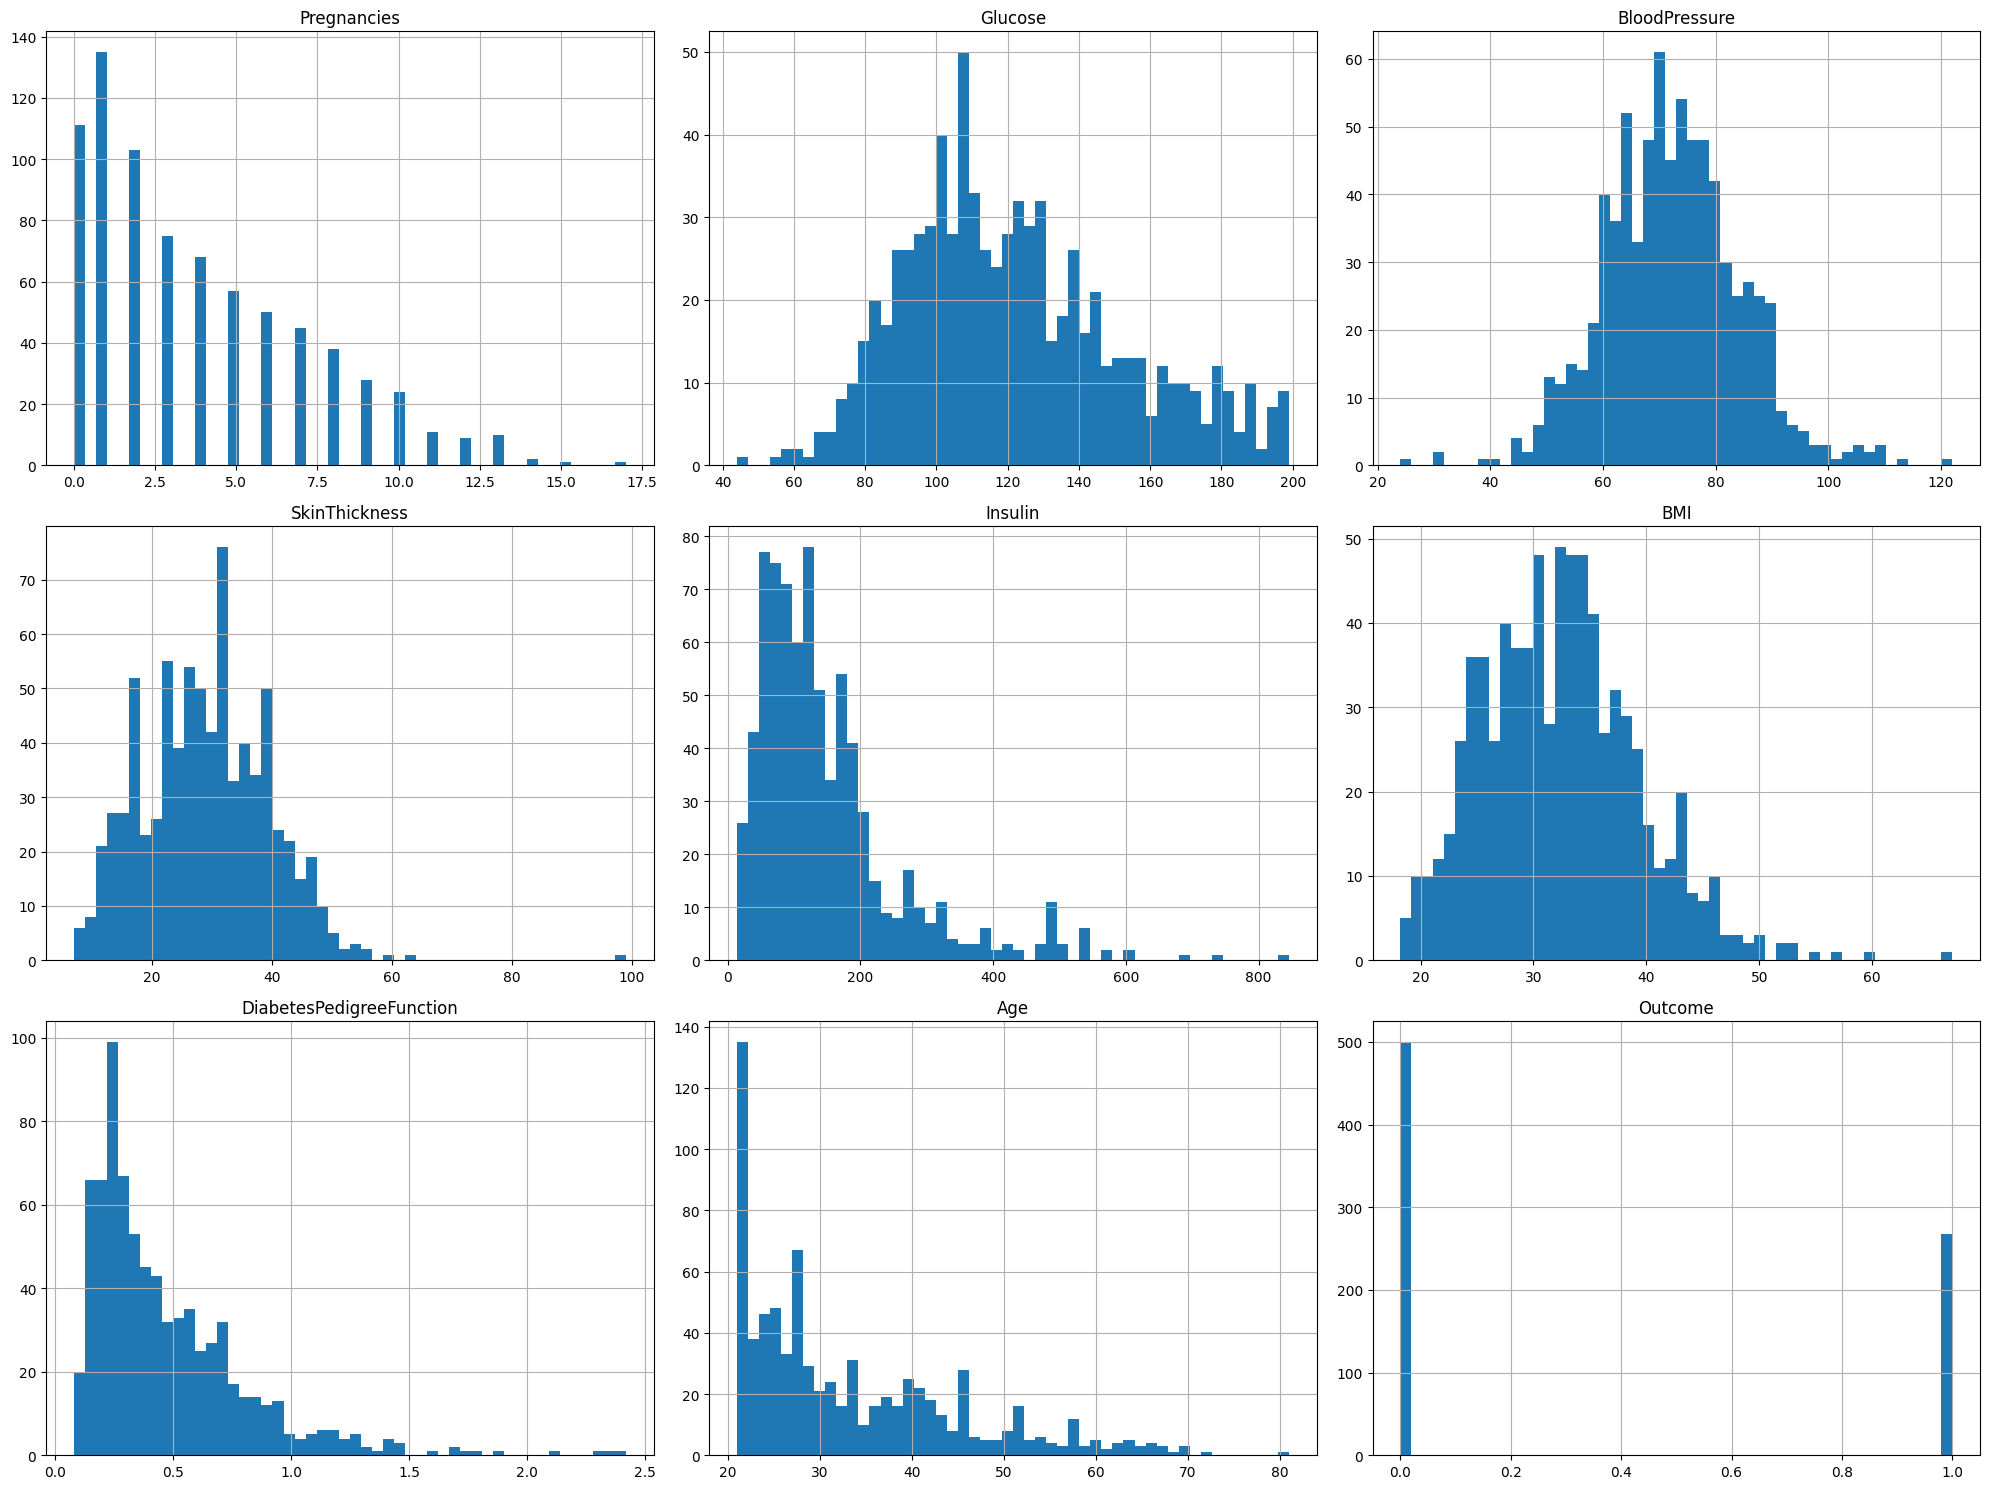

In [7]:
from utils.normalize import muestreo_aleatorio

names=["Insulin","Glucose","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction"]

for columnName in names:
    muestreo_aleatorio(df,columnName)


hist(df)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
outcome=df['Outcome']
to_tranform=df.drop('Outcome',axis=1)
dftranformed = scaler.fit_transform(to_tranform)
df=pd.DataFrame(dftranformed, columns=to_tranform.columns)
df["Outcome"]=outcome
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.862571,-0.019988,0.573401,-0.346718,0.167807,0.468492,1.425995,1
1,-0.844885,-1.199824,-0.507307,-0.003380,-0.688528,-0.847303,-0.365061,-0.190672,0
2,1.233880,2.008345,-0.669746,0.957921,0.047679,-1.325855,0.604397,-0.105584,1
3,-0.844885,-1.068878,-0.507307,-0.580160,-0.486948,-0.629780,-0.920763,-1.041549,0
4,-1.141852,0.502470,-2.619023,0.573401,0.161616,1.545456,5.484909,-0.020496,1


In [9]:

df.to_csv('./outputs/diabetes.csv', index=False)